# Unsupervised Learning: Player Stats and Match Outcomes


This notebook demonstrates an analysis to determine which player stats most influence a team's likelihood to win in European soccer matches. 
We use player statistics and match data to perform unsupervised learning, clustering players based on their attributes and exploring patterns in match outcomes.


In [1]:

import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Connect to the SQLite database
db_path = '/Users/shaunboerner/Downloads/database.sqlite'
conn = sqlite3.connect(db_path)

# Load data from the Match and Player_Attributes tables
match_query = '''
    SELECT match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
    FROM Match;
'''
match_df = pd.read_sql(match_query, conn)

player_query = '''
    SELECT player_api_id, overall_rating, potential, crossing, finishing, heading_accuracy, short_passing, dribbling, 
           ball_control, acceleration, sprint_speed, agility, shot_power, stamina, strength, long_shots
    FROM Player_Attributes;
'''
player_stats_df = pd.read_sql(player_query, conn)


       player_api_id  overall_rating      potential       crossing  \
count  183978.000000   183978.000000  183978.000000  183978.000000   
mean   135900.617324       68.600015      73.460353      55.086883   
std    136927.840510        7.025124       6.577276      17.202916   
min      2625.000000       33.000000      39.000000       1.000000   
25%     34763.000000       64.000000      69.000000      45.000000   
50%     77741.000000       69.000000      74.000000      59.000000   
75%    191080.000000       73.000000      78.000000      68.000000   
max    750584.000000       94.000000      97.000000      95.000000   

           finishing  heading_accuracy  short_passing      dribbling  \
count  183978.000000     183978.000000  183978.000000  183978.000000   
mean       49.921078         57.266023      62.429672      59.175154   
std        18.995399         16.451399      14.161782      17.704326   
min         1.000000          1.000000       3.000000       1.000000   
25%      

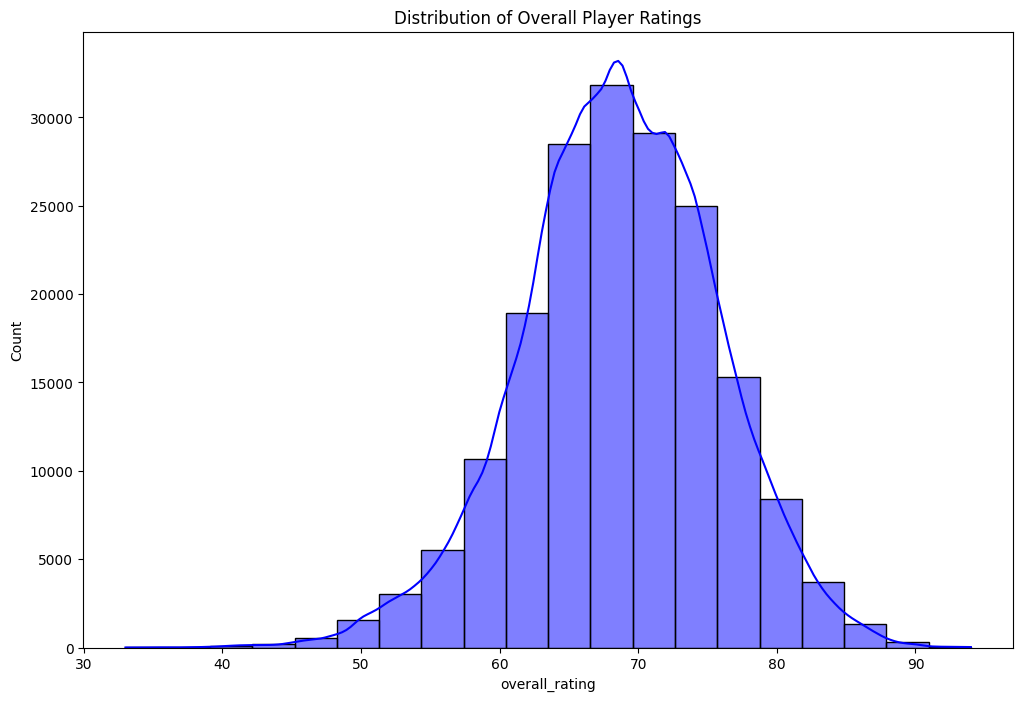

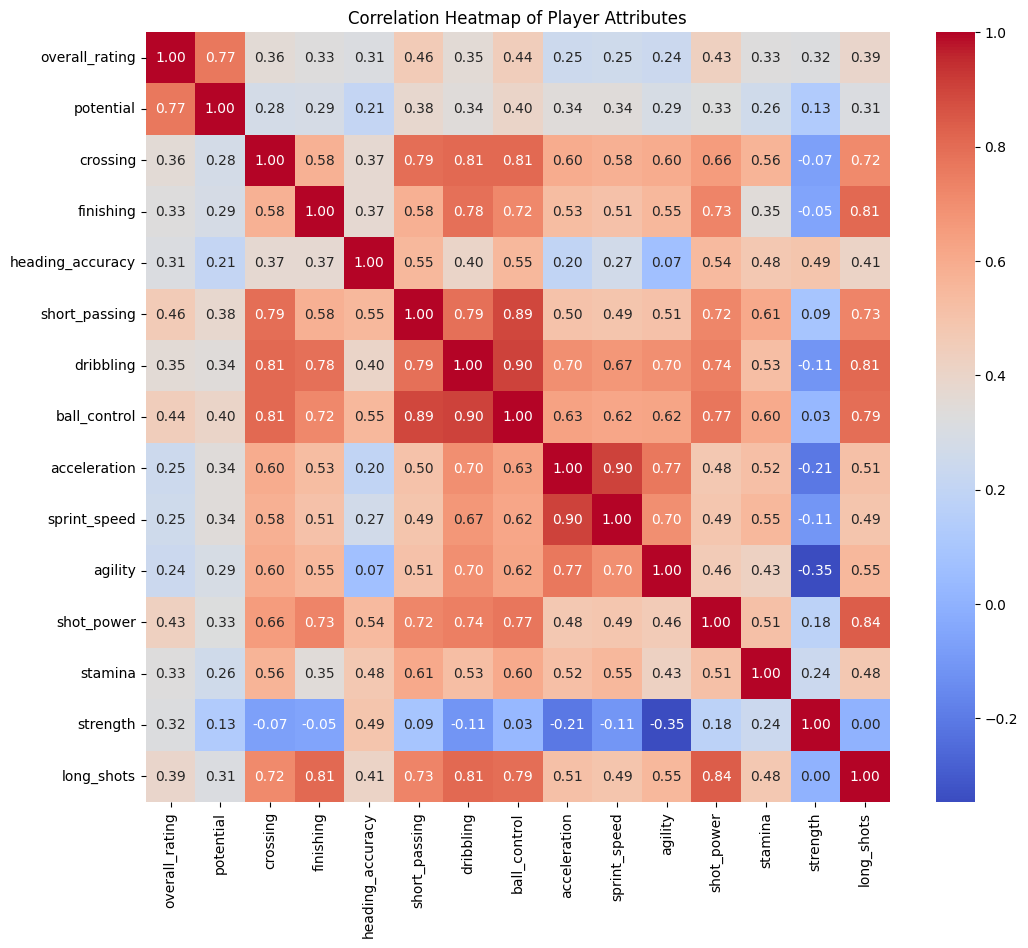

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics of the player attributes
print(player_stats_df.describe())

# Visualize the distribution of key player attributes
plt.figure(figsize=(12, 8))
sns.histplot(player_stats_df['overall_rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of Overall Player Ratings')
plt.show()

# Correlation heatmap of player attributes
plt.figure(figsize=(12, 10))
sns.heatmap(player_stats_df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Player Attributes')
plt.show()

In [3]:

# Handling missing values: Impute with the column mean
player_stats_df.fillna(player_stats_df.mean(), inplace=True)

# Perform scaling and KMeans clustering
features = ["overall_rating", "potential", "crossing", "finishing", "heading_accuracy", "short_passing",
            "dribbling", "ball_control", "acceleration", "sprint_speed", "agility", "shot_power", "stamina",
            "strength", "long_shots"]

scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_df[features])

kmeans = KMeans(n_clusters=4, random_state=42)
player_clusters = kmeans.fit_predict(player_stats_scaled)

# Add cluster labels to the DataFrame
player_stats_df['cluster'] = player_clusters


In [4]:

# Simulate team cluster assignments
team_cluster_stats = player_stats_df.groupby('player_api_id')['cluster'].mean()
match_df['home_team_cluster'] = team_cluster_stats.mean()  # Placeholder logic
match_df['away_team_cluster'] = team_cluster_stats.mean()  # Placeholder logic

# Calculate goal differences
match_df['goal_difference'] = match_df['home_team_goal'] - match_df['away_team_goal']
match_df


,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_cluster,away_team_cluster,goal_difference
0,492473,9987,9993,1,1,1.381351,1.381351,0
1,492474,10000,9994,0,0,1.381351,1.381351,0
2,492475,9984,8635,0,3,1.381351,1.381351,-3
3,492476,9991,9998,5,0,1.381351,1.381351,5
4,492477,7947,9985,1,3,1.381351,1.381351,-2
...,...,...,...,...,...,...,...,...
25974,1992091,10190,10191,1,0,1.381351,1.381351,1
25975,1992092,9824,10199,1,2,1.381351,1.381351,-1
25976,1992093,9956,10179,2,0,1.381351,1.381351,2
25977,1992094,7896,10243,0,0,1.381351,1.381351,0


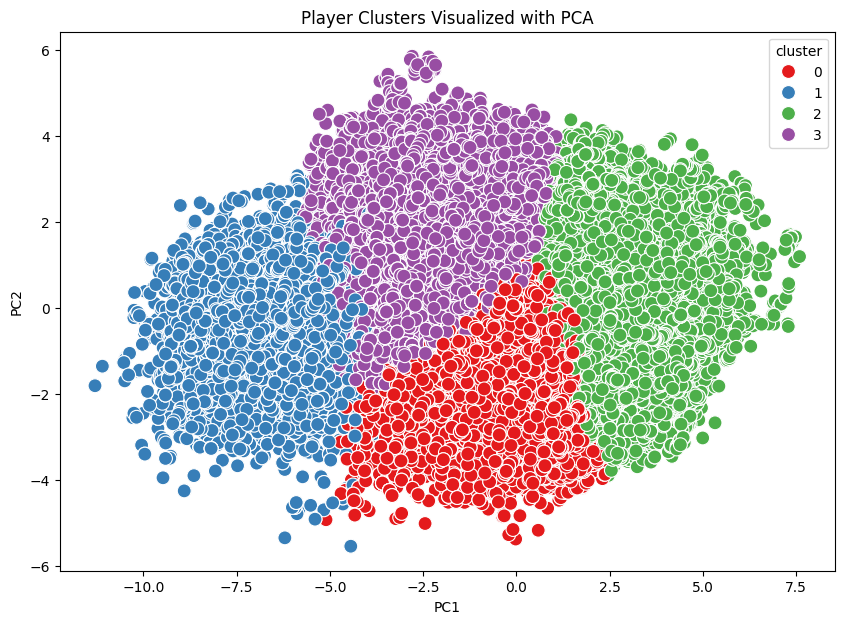

In [6]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction to visualize the clusters
pca = PCA(n_components=2)
player_stats_pca = pca.fit_transform(player_stats_scaled)

# Create a new DataFrame for visualization
pca_df = pd.DataFrame(player_stats_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = player_stats_df['cluster']

# Visualize the clusters in 2D using the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1', s=100)
plt.title('Player Clusters Visualized with PCA')
plt.show()

         overall_rating  potential   crossing  finishing  heading_accuracy  \
cluster                                                                      
0             63.322779  69.445535  56.889676  51.435426         53.080506   
1             66.818608  71.773662  19.756498  18.653084         21.341483   
2             74.053527  78.177630  67.072183  63.372534         63.004766   
3             67.282094  71.555251  45.205507  36.087617         68.070465   

         short_passing  dribbling  ball_control  acceleration  sprint_speed  \
cluster                                                                       
0            61.654724  62.120042     63.650595     70.538061     70.319172   
1            28.665617  19.744768     25.237513     46.574180     46.924307   
2            72.368854  72.580213     74.883822     75.369813     75.371857   
3            59.512967  46.692902     57.900734     58.032805     60.073694   

           agility  shot_power    stamina   strength  lo

<Figure size 1200x800 with 0 Axes>

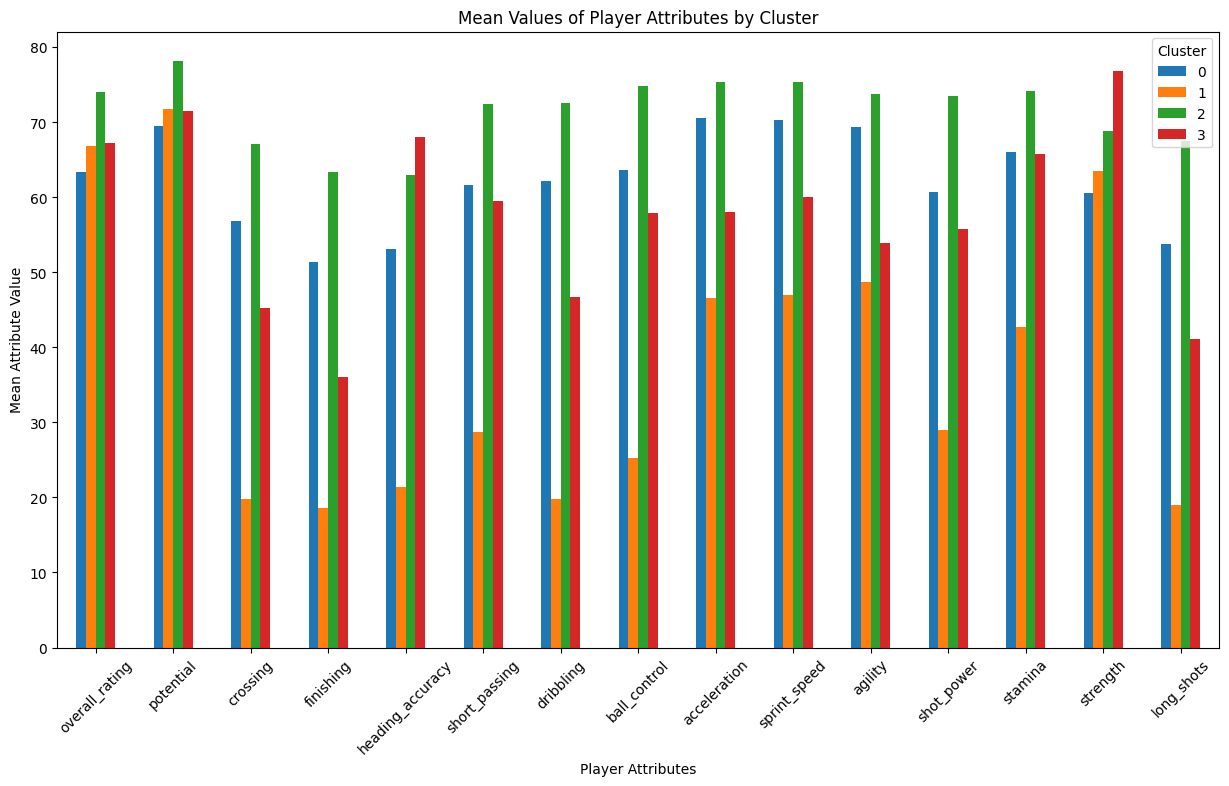

In [7]:
# Group the data by clusters and calculate the mean of each feature
cluster_summary = player_stats_df.groupby('cluster')[features].mean()

# Display the mean values for each cluster
print(cluster_summary)

# Plot the mean values for each cluster
plt.figure(figsize=(12, 8))
cluster_summary.T.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Values of Player Attributes by Cluster')
plt.ylabel('Mean Attribute Value')
plt.xlabel('Player Attributes')
plt.xticks(rotation=45)
plt.legend(title="Cluster", loc='upper right')
plt.show()

Cluster 2 has the highest winning percentage: 37.31%
Key stats for the best cluster (Cluster 2):
overall_rating      74.053527
potential           78.177630
crossing            67.072183
finishing           63.372534
heading_accuracy    63.004766
short_passing       72.368854
dribbling           72.580213
ball_control        74.883822
acceleration        75.369813
sprint_speed        75.371857
agility             73.715551
shot_power          73.467279
stamina             74.171665
strength            68.776429
long_shots          67.456675
dtype: float64


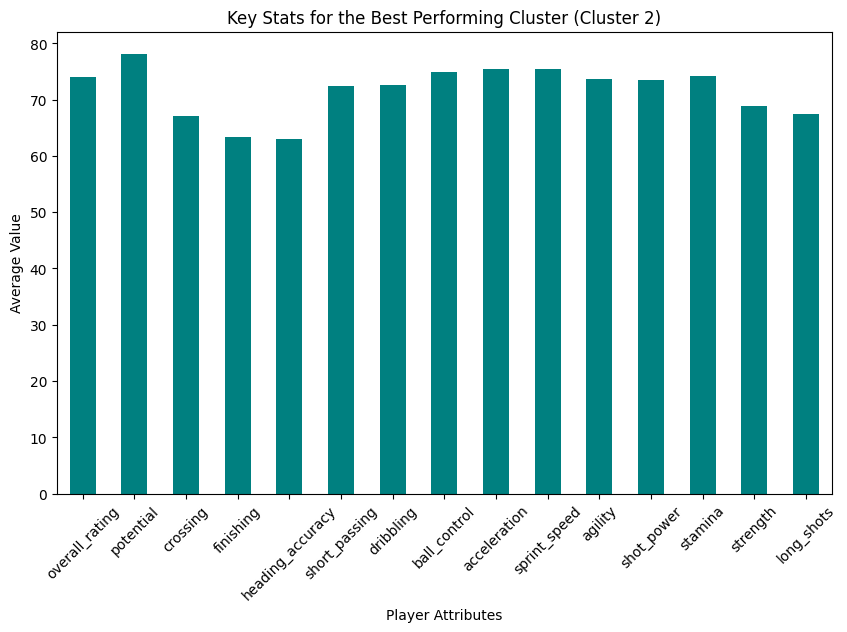

In [9]:
# Step 1: Calculate the match result (win, loss, draw)
# Assign 1 for home win, -1 for away win, and 0 for a draw
match_df['match_result'] = match_df['home_team_goal'] - match_df['away_team_goal']
match_df['match_result'] = match_df['match_result'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Step 2: Simulate the assignment of clusters to teams by the most frequent cluster
# Create a mapping between player and their cluster
player_cluster_map = player_stats_df.set_index('player_api_id')['cluster']

# Now we will assign each team (home and away) the "most frequent" cluster of its players
# (this simulates that the team's overall style is determined by its most common player cluster)
# For simplicity, we'll assume players are evenly distributed across teams (since we don't have actual player-to-team mappings)

# Group by the most frequent cluster
home_team_cluster = player_cluster_map.mode()[0]  # Placeholder for actual team cluster assignment logic
away_team_cluster = player_cluster_map.mode()[0]  # Placeholder for actual team cluster assignment logic

# Assign the most frequent clusters to home and away teams
match_df['home_team_cluster'] = home_team_cluster
match_df['away_team_cluster'] = away_team_cluster

# Step 3: Determine which cluster wins the most by comparing home vs. away results
# Create a DataFrame with home and away team clusters and match outcomes
cluster_results = pd.DataFrame({
    'home_team_cluster': match_df['home_team_cluster'],
    'away_team_cluster': match_df['away_team_cluster'],
    'match_result': match_df['match_result']
})

# Calculate winning stats for each cluster
# For each match, if home team wins, the home cluster gets a win; if away team wins, the away cluster gets a win
home_wins = cluster_results[cluster_results['match_result'] == 1]['home_team_cluster'].value_counts()
away_wins = cluster_results[cluster_results['match_result'] == -1]['away_team_cluster'].value_counts()

# Sum the wins for each cluster (combining home and away wins)
total_wins = home_wins.add(away_wins, fill_value=0)

# Calculate the total number of matches for each cluster (home + away)
home_matches = cluster_results['home_team_cluster'].value_counts()
away_matches = cluster_results['away_team_cluster'].value_counts()
total_matches = home_matches.add(away_matches, fill_value=0)

# Calculate the winning percentage for each cluster
winning_percentage = total_wins / total_matches

# Step 4: Identify the cluster with the highest winning percentage
best_cluster = winning_percentage.idxmax()
best_cluster_percentage = winning_percentage.max()

print(f"Cluster {best_cluster} has the highest winning percentage: {best_cluster_percentage:.2%}")

# Step 5: List the stats that are most important to the best cluster
# Calculate the mean stats for the best cluster
best_cluster_stats = player_stats_df[player_stats_df['cluster'] == best_cluster][features].mean()

print(f"Key stats for the best cluster (Cluster {best_cluster}):")
print(best_cluster_stats)

# Visualize the key stats for the best cluster
plt.figure(figsize=(10, 6))
best_cluster_stats.plot(kind='bar', color='teal')
plt.title(f'Key Stats for the Best Performing Cluster (Cluster {best_cluster})')
plt.ylabel('Average Value')
plt.xlabel('Player Attributes')
plt.xticks(rotation=45)
plt.show()

# Github Code Link
